In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
from astropy.table import Table
from astropy.io import fits

In [ ]:
from astropy.nddata import Cutout2D

In [ ]:
import gc

In [11]:
def custom_histogram(vector, bins=None, cumulative=False, errors=False):
    if bins is None:
        hh = np.histogram(vector)
    else: 
        hh = np.histogram(vector, bins=bins)
    dx = hh[1][1] - hh[1][0]
    x_bins = hh[1][:-1] + dx

    if cumulative is True:
        vals = [sum(hh[0][:i+1]) for i, _ in enumerate(hh[0])]
        if errors:
            err = np.sqrt(hh[0])
            return x_bins, vals, err
        return x_bins, vals

    elif cumulative == -1:
        vals = [sum(hh[0][i:]) for i, _ in enumerate(hh[0])]
        if errors:
            err = np.sqrt(hh[0])
            return x_bins, vals, err
        return x_bins, vals
    
    else:
        if errors:
            err = np.sqrt(hh[0])
            return x_bins, hh[0], err
        
        return x_bins, hh[0]

In [12]:
engine = create_engine('sqlite:///../RBpipeline/rbogus-dev.db')

In [13]:
simulated = pd.read_sql_query("""SELECT * FROM Simulated""", engine)

In [14]:
sim_images = pd.read_sql_table('Images', engine)

In [15]:
positives = []
# negatives = []
randoms   = []

for sim_image in sim_images.itertuples():
    cat = simulated[simulated['simage_id']==int(sim_image.id)]
    
    imgpath = sim_image.path.strip('diff.fits')+'s_diff.fits'
    img = fits.open(imgpath, memmap=False)
    pxdata = img[0].data.copy()
    img.close()
    normalized = pxdata/np.std(pxdata)
    for obj in cat.itertuples():
        x = obj.x #int(np.round(obj.x))
        y = obj.y #int(np.round(obj.y))
        if x>1023. or y>1023. or x<0. or y<0.:
            continue
            
        positives.append(Cutout2D(normalized, (x, y), size=(20,20)))
        xr, yr = np.random.randint(low=20, high=1004, size=2)
        randoms.append(Cutout2D(normalized, (xr, yr), size=(20,20)))
    
    gc.collect()

In [16]:
positives = np.asarray(positives)
patches_pos = np.zeros((len(positives), 20, 20))
for i, elem in enumerate(positives):
    dx, dy = elem.data.shape
    patches_pos[i, :dx, :dy] = elem.data

del(positives)    
gc.collect()

randoms = np.asarray(randoms)
patches_rnd = np.zeros((len(randoms), 20, 20))
for i, elem in enumerate(randoms):
    dx, dy = elem.data.shape
    patches_rnd[i, :dx, :dy] = elem.data
del(randoms)
gc.collect()

0

(array([  1.22910000e+04,   4.01751360e+07,   5.53800000e+03,
          1.67500000e+03,   7.43000000e+02,   3.50000000e+02,
          1.68000000e+02,   6.60000000e+01,   2.70000000e+01,
          6.00000000e+00]),
 array([ -30.04987875,   -1.90001549,   26.24984777,   54.39971103,
          82.5495743 ,  110.69943756,  138.84930082,  166.99916408,
         195.14902735,  223.29889061,  251.44875387]),
 <a list of 10 Patch objects>)

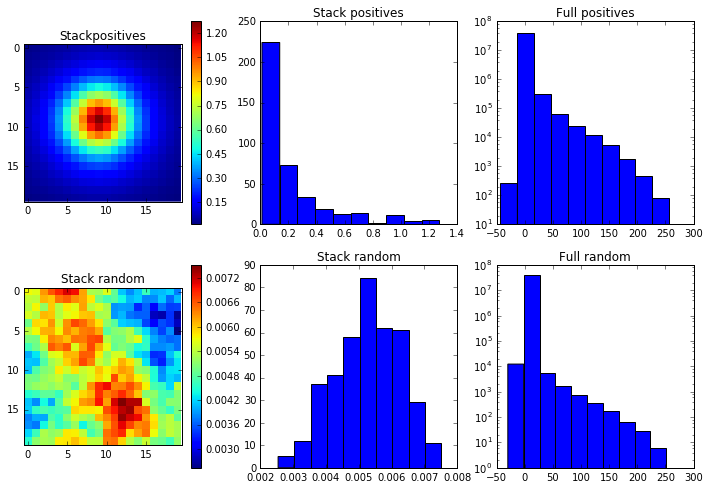

In [17]:
stack_pos = np.median(patches_pos, axis=0)
gc.collect()
stack_rnd = np.median(patches_rnd, axis=0)
gc.collect()

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Stackpositives')
plt.imshow(stack_pos, interpolation='none')
plt.colorbar()
plt.subplot(234)
plt.title('Stack random')
plt.imshow(stack_rnd, interpolation='none')
plt.colorbar()
plt.subplot(232)
plt.title('Stack positives')
plt.hist(stack_pos.flatten(), log=False)
plt.subplot(235)
plt.title('Stack random')
plt.hist(stack_rnd.flatten(), log=False)
plt.subplot(233)
plt.title('Full positives')
plt.hist(patches_pos.flatten(), log=True)
plt.subplot(236)
plt.title('Full random')
plt.hist(patches_rnd.flatten(), log=True)


Now we stack on simulated position for each method

In [19]:
positives = []
# negatives = []
randoms   = []

for sim_image in sim_images.itertuples():
    cat = simulated[simulated['simage_id']==int(sim_image.id)]
    
    imgpath = sim_image.path.strip('diff.fits')+'diff.fits'
    img = fits.open(imgpath, memmap=False)
    pxdata = img[0].data.copy()
    img.close()
    normalized = pxdata/np.std(pxdata)
    for obj in cat.itertuples():
        x = obj.x #int(np.round(obj.x))
        y = obj.y #int(np.round(obj.y))
        if x>1023. or y>1023. or x<0. or y<0.:
            continue
            
        positives.append(Cutout2D(normalized, (x, y), size=(20,20)))
        xr, yr = np.random.randint(low=20, high=1004, size=2)
        randoms.append(Cutout2D(normalized, (xr, yr), size=(20,20)))
    
    gc.collect()

In [20]:
positives = np.asarray(positives)
patches_pos = np.zeros((len(positives), 20, 20))
for i, elem in enumerate(positives):
    dx, dy = elem.data.shape
    patches_pos[i, :dx, :dy] = elem.data

del(positives)    
gc.collect()

randoms = np.asarray(randoms)
patches_rnd = np.zeros((len(randoms), 20, 20))
for i, elem in enumerate(randoms):
    dx, dy = elem.data.shape
    patches_rnd[i, :dx, :dy] = elem.data
del(randoms)
gc.collect()

0

(array([  8.80000000e+01,   4.01927570e+07,   2.36800000e+03,
          4.46000000e+02,   1.86000000e+02,   8.40000000e+01,
          4.70000000e+01,   1.50000000e+01,   8.00000000e+00,
          1.00000000e+00]),
 array([ -63.36193615,  -21.75116075,   19.85961465,   61.47039005,
         103.08116545,  144.69194085,  186.30271625,  227.91349165,
         269.52426704,  311.13504244,  352.74581784]),
 <a list of 10 Patch objects>)

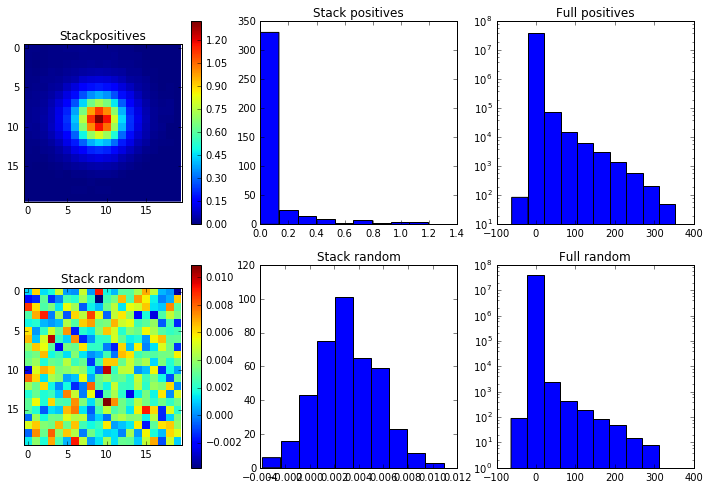

In [21]:
stack_pos = np.median(patches_pos, axis=0)
gc.collect()
stack_rnd = np.median(patches_rnd, axis=0)
gc.collect()

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Stackpositives')
plt.imshow(stack_pos, interpolation='none')
plt.colorbar()
plt.subplot(234)
plt.title('Stack random')
plt.imshow(stack_rnd, interpolation='none')
plt.colorbar()
plt.subplot(232)
plt.title('Stack positives')
plt.hist(stack_pos.flatten(), log=False)
plt.subplot(235)
plt.title('Stack random')
plt.hist(stack_rnd.flatten(), log=False)
plt.subplot(233)
plt.title('Full positives')
plt.hist(patches_pos.flatten(), log=True)
plt.subplot(236)
plt.title('Full random')
plt.hist(patches_rnd.flatten(), log=True)


In [22]:
positives = []
# negatives = []
randoms   = []

for sim_image in sim_images.itertuples():
    cat = simulated[simulated['simage_id']==int(sim_image.id)]
    
    imgpath = sim_image.path.strip('diff.fits')+'diff_ois.fits'
    img = fits.open(imgpath, memmap=False)
    pxdata = img[0].data.copy()
    img.close()
    normalized = pxdata/np.std(pxdata)
    for obj in cat.itertuples():
        x = obj.x #int(np.round(obj.x))
        y = obj.y #int(np.round(obj.y))
        if x>1023. or y>1023. or x<0. or y<0.:
            continue
            
        positives.append(Cutout2D(normalized, (x, y), size=(20,20)))
        xr, yr = np.random.randint(low=20, high=1004, size=2)
        randoms.append(Cutout2D(normalized, (xr, yr), size=(20,20)))
    
    gc.collect()

In [23]:
positives = np.asarray(positives)
patches_pos = np.zeros((len(positives), 20, 20))
for i, elem in enumerate(positives):
    dx, dy = elem.data.shape
    patches_pos[i, :dx, :dy] = elem.data

del(positives)    
gc.collect()

randoms = np.asarray(randoms)
patches_rnd = np.zeros((len(randoms), 20, 20))
for i, elem in enumerate(randoms):
    dx, dy = elem.data.shape
    patches_rnd[i, :dx, :dy] = elem.data
del(randoms)
gc.collect()

0

(array([  4.36800000e+03,   4.01892030e+07,   1.45100000e+03,
          4.54000000e+02,   2.25000000e+02,   1.52000000e+02,
          6.30000000e+01,   4.20000000e+01,   3.60000000e+01,
          6.00000000e+00]),
 array([ -42.86576304,   -4.48081301,   33.90413702,   72.28908705,
         110.67403708,  149.05898711,  187.44393714,  225.82888717,
         264.2138372 ,  302.59878723,  340.98373726]),
 <a list of 10 Patch objects>)

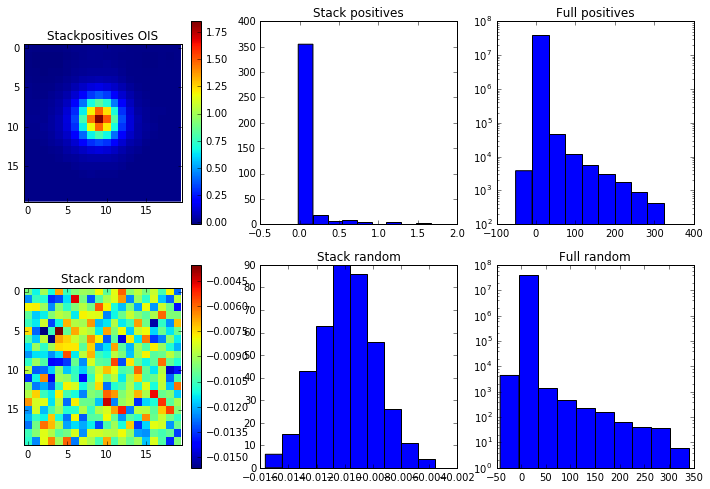

In [24]:
stack_pos = np.median(patches_pos, axis=0)
gc.collect()
stack_rnd = np.median(patches_rnd, axis=0)
gc.collect()

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Stackpositives OIS')
plt.imshow(stack_pos, interpolation='none')
plt.colorbar()
plt.subplot(234)
plt.title('Stack random')
plt.imshow(stack_rnd, interpolation='none')
plt.colorbar()
plt.subplot(232)
plt.title('Stack positives')
plt.hist(stack_pos.flatten(), log=False)
plt.subplot(235)
plt.title('Stack random')
plt.hist(stack_rnd.flatten(), log=False)
plt.subplot(233)
plt.title('Full positives')
plt.hist(patches_pos.flatten(), log=True)
plt.subplot(236)
plt.title('Full random')
plt.hist(patches_rnd.flatten(), log=True)


In [25]:
positives = []
# negatives = []
randoms   = []

for sim_image in sim_images.itertuples():
    cat = simulated[simulated['simage_id']==int(sim_image.id)]
    
    imgpath = sim_image.path.strip('diff.fits')+'diff_hot.fits'
    img = fits.open(imgpath, memmap=False)
    pxdata = img[0].data.copy()
    img.close()
    normalized = pxdata/np.std(pxdata)
    for obj in cat.itertuples():
        x = obj.x #int(np.round(obj.x))
        y = obj.y #int(np.round(obj.y))
        if x>1023. or y>1023. or x<0. or y<0.:
            continue
            
        positives.append(Cutout2D(normalized, (x, y), size=(20,20)))
        xr, yr = np.random.randint(low=20, high=1004, size=2)
        randoms.append(Cutout2D(normalized, (xr, yr), size=(20,20)))
    
    gc.collect()

In [26]:
positives = np.asarray(positives)
patches_pos = np.zeros((len(positives), 20, 20))
for i, elem in enumerate(positives):
    dx, dy = elem.data.shape
    patches_pos[i, :dx, :dy] = elem.data

del(positives)    
gc.collect()

randoms = np.asarray(randoms)
patches_rnd = np.zeros((len(randoms), 20, 20))
for i, elem in enumerate(randoms):
    dx, dy = elem.data.shape
    patches_rnd[i, :dx, :dy] = elem.data
del(randoms)
gc.collect()

0

(array([  5.00000000e+00,   7.00000000e+00,   4.00000000e+01,
          3.08000000e+02,   4.01922960e+07,   2.58200000e+03,
          4.82000000e+02,   1.94000000e+02,   5.90000000e+01,
          2.70000000e+01]),
 array([-185.57174683, -144.10097656, -102.6302063 ,  -61.15943604,
         -19.68866577,   21.78210449,   63.25287476,  104.72364502,
         146.19441528,  187.66518555,  229.13595581]),
 <a list of 10 Patch objects>)

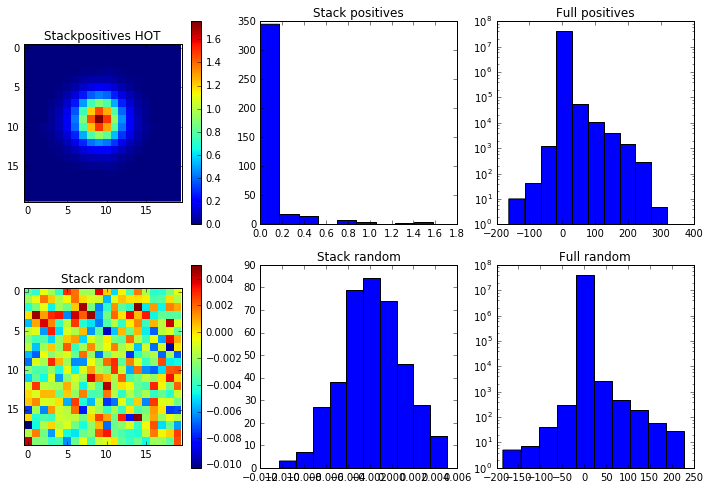

In [27]:
stack_pos = np.median(patches_pos, axis=0)
gc.collect()
stack_rnd = np.median(patches_rnd, axis=0)
gc.collect()

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Stackpositives HOT')
plt.imshow(stack_pos, interpolation='none')
plt.colorbar()
plt.subplot(234)
plt.title('Stack random')
plt.imshow(stack_rnd, interpolation='none')
plt.colorbar()
plt.subplot(232)
plt.title('Stack positives')
plt.hist(stack_pos.flatten(), log=False)
plt.subplot(235)
plt.title('Stack random')
plt.hist(stack_rnd.flatten(), log=False)
plt.subplot(233)
plt.title('Full positives')
plt.hist(patches_pos.flatten(), log=True)
plt.subplot(236)
plt.title('Full random')
plt.hist(patches_rnd.flatten(), log=True)


In [35]:
del(patches_pos)
del(patches_rnd)
del(pxdata)
del(normalized)
gc.collect()


0